<center> project No #2 <br>
 Airbnb Listing EDA<br>
 using Albany, New York, United States dataset </center>

In [1]:
# imprting the library :
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# loading data set :
df=pd.read_csv("listings.csv")

In [3]:
# show the first 5 rows 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,NaN,FOURTEENTH WARD,42.66719,-73.81580,Private room,50.0,1,242,2024-02-10,1.91,1,0,48,NaN
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.65789,-73.75370,Entire home/apt,70.0,28,9,2022-08-17,0.08,1,349,0,NaN
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,125.0,2,291,2023-11-19,2.52,4,357,8,NaN
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,SECOND WARD,42.64615,-73.75966,Entire home/apt,68.0,2,333,2024-02-01,3.12,2,148,28,NaN
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,140.0,1,306,2023-12-26,2.89,4,0,5,NaN


In [4]:
#to checking about dataset shape:
df.shape

(407, 18)

In [5]:
# take a snapshot of the data characteristic
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              407 non-null    int64  
 1   name                            407 non-null    object 
 2   host_id                         407 non-null    int64  
 3   host_name                       407 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   407 non-null    object 
 6   latitude                        407 non-null    float64
 7   longitude                       407 non-null    float64
 8   room_type                       407 non-null    object 
 9   price                           364 non-null    float64
 10  minimum_nights                  407 non-null    int64  
 11  number_of_reviews               407 non-null    int64  
 12  last_review                     360 

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [7]:
# remove unwanted columns:
df.drop(['id','last_review','neighbourhood_group','license'],axis=1,inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,407.0,2.252770e+08,1.804499e+08,649068.000000,4.762598e+07,1.886791e+08,3.920749e+08,5.531120e+08
latitude,407.0,4.265757e+01,9.792107e-03,42.630660,4.265204e+01,4.265730e+01,4.266241e+01,4.271490e+01
longitude,407.0,-7.377680e+01,1.957794e-02,-73.876489,-7.379036e+01,-7.377351e+01,-7.376199e+01,-7.373810e+01
price,364.0,1.252033e+02,1.355857e+02,26.000000,7.500000e+01,1.000000e+02,1.312500e+02,1.750000e+03
minimum_nights,407.0,5.336609e+00,2.162083e+01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,3.650000e+02
number_of_reviews,407.0,5.373464e+01,9.744051e+01,0.000000,4.000000e+00,1.500000e+01,5.950000e+01,7.700000e+02
reviews_per_month,360.0,1.983972e+00,1.989692e+00,0.050000,5.200000e-01,1.310000e+00,2.722500e+00,1.112000e+01
calculated_host_listings_count,407.0,4.783784e+00,4.772915e+00,1.000000,1.000000e+00,3.000000e+00,6.000000e+00,1.900000e+01
availability_365,407.0,2.036216e+02,1.343407e+02,0.000000,7.700000e+01,2.480000e+02,3.255000e+02,3.650000e+02
number_of_reviews_ltm,407.0,1.608845e+01,2.179477e+01,0.000000,1.000000e+00,7.000000e+00,2.200000e+01,1.310000e+02


In [9]:
df.describe(include='object')


,name,host_name,neighbourhood,room_type
count,407,407,407,407
unique,406,178,15,3
top,Lovely private room in Albany,Diana,SIXTH WARD,Entire home/apt
freq,2,22,86,285


In [10]:
df.isnull().sum()

name                               0
host_id                            0
host_name                          0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                             43
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                 47
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
dtype: int64

In [11]:
price_null=df['price'].isnull().value_counts()
r_p_m_null=df['reviews_per_month'].isnull().value_counts()

In [12]:
print('price:\n','\n',price_null,'\n''reviews_per_month:\n',r_p_m_null)

price:
 
 False    364
True      43
Name: price, dtype: int64 
reviews_per_month:
 False    360
True      47
Name: reviews_per_month, dtype: int64


In [13]:
df.neighbourhood.unique()

array(['FOURTEENTH WARD', 'THIRD WARD', 'SIXTH WARD', 'SECOND WARD',
       'TENTH WARD', 'FIFTEENTH WARD', 'ELEVENTH WARD', 'NINTH WARD',
       'FIFTH WARD', 'SEVENTH WARD', 'THIRTEENTH WARD', 'EIGHTH WARD',
       'FOURTH WARD', 'FIRST WARD', 'TWELFTH WARD'], dtype=object)

In [14]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [15]:
df['price']=df['price'].fillna(0)

In [16]:
df["reviews_per_month"]=df["reviews_per_month"].replace(np.nan, df["reviews_per_month"].mode().iloc[0])

In [17]:
df.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [18]:
df['availability_365'].value_counts()

0      76
364    12
356     9
362     8
360     7
       ..
7       1
323     1
103     1
195     1
267     1
Name: availability_365, Length: 176, dtype: int64

array([[<Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >,
        <Axes: >]], dtype=object)

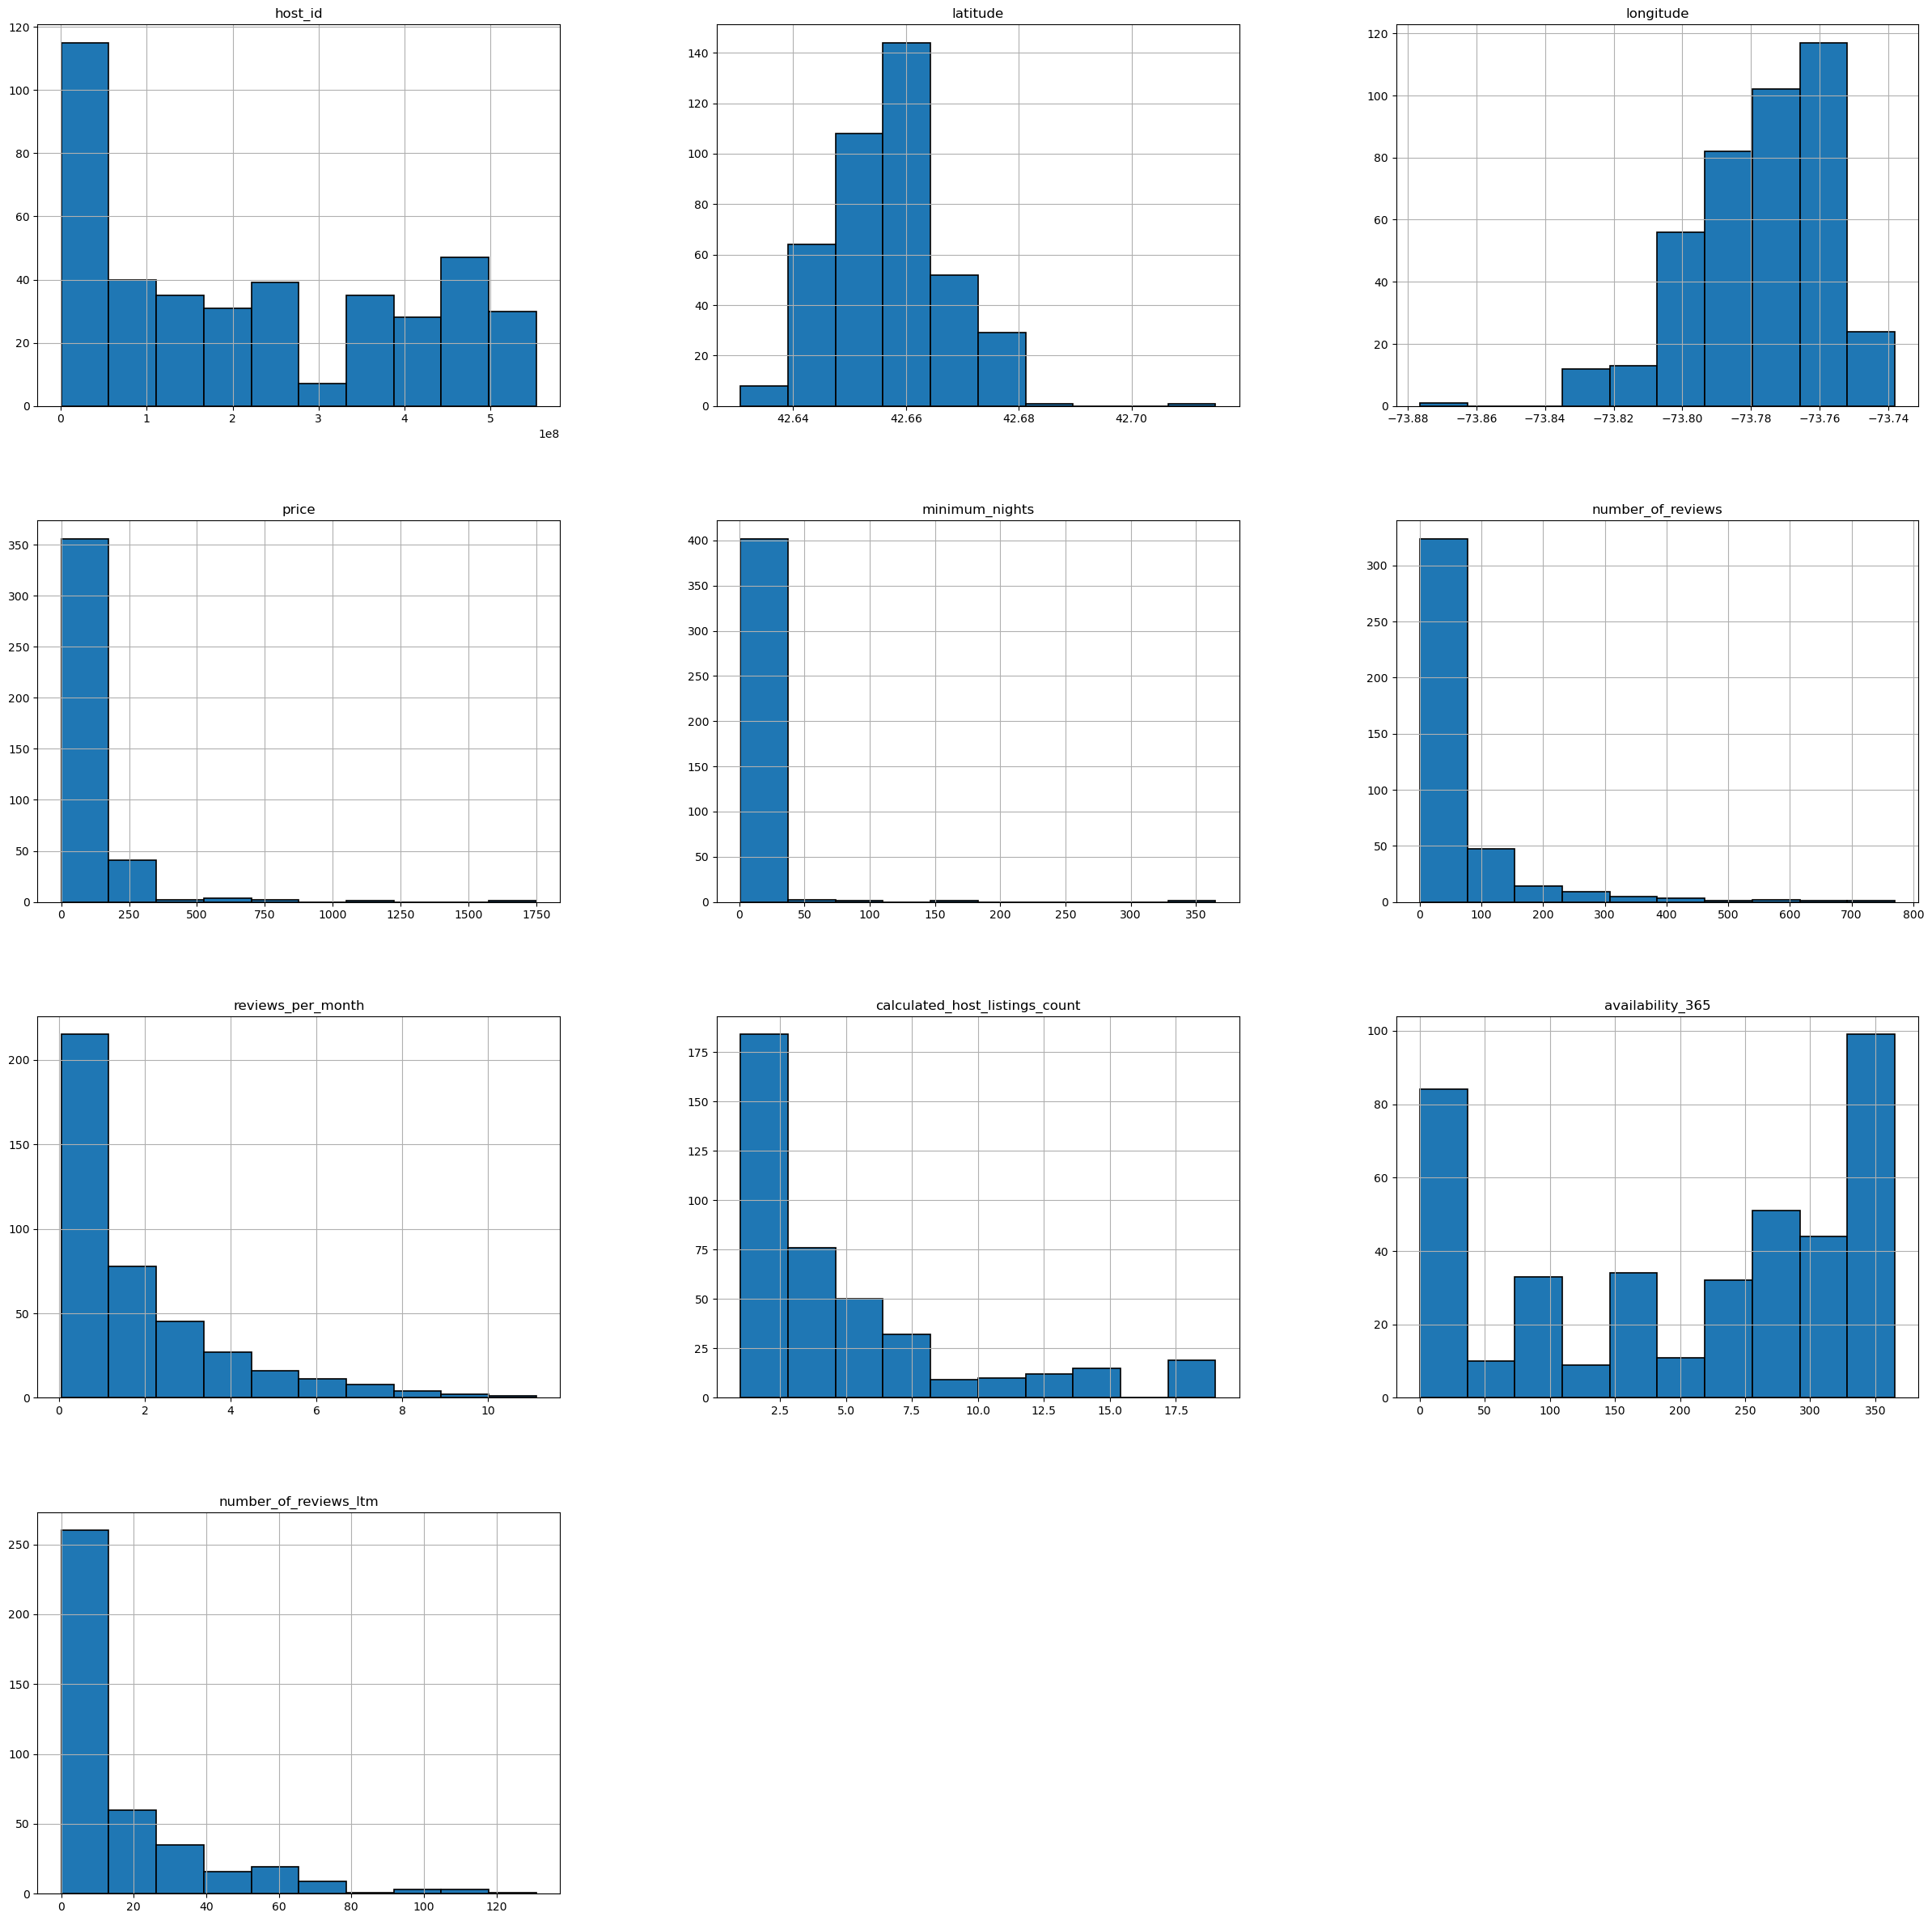

In [19]:
# Visualizing the distribution for every "feature"
df.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30))

<Axes: >

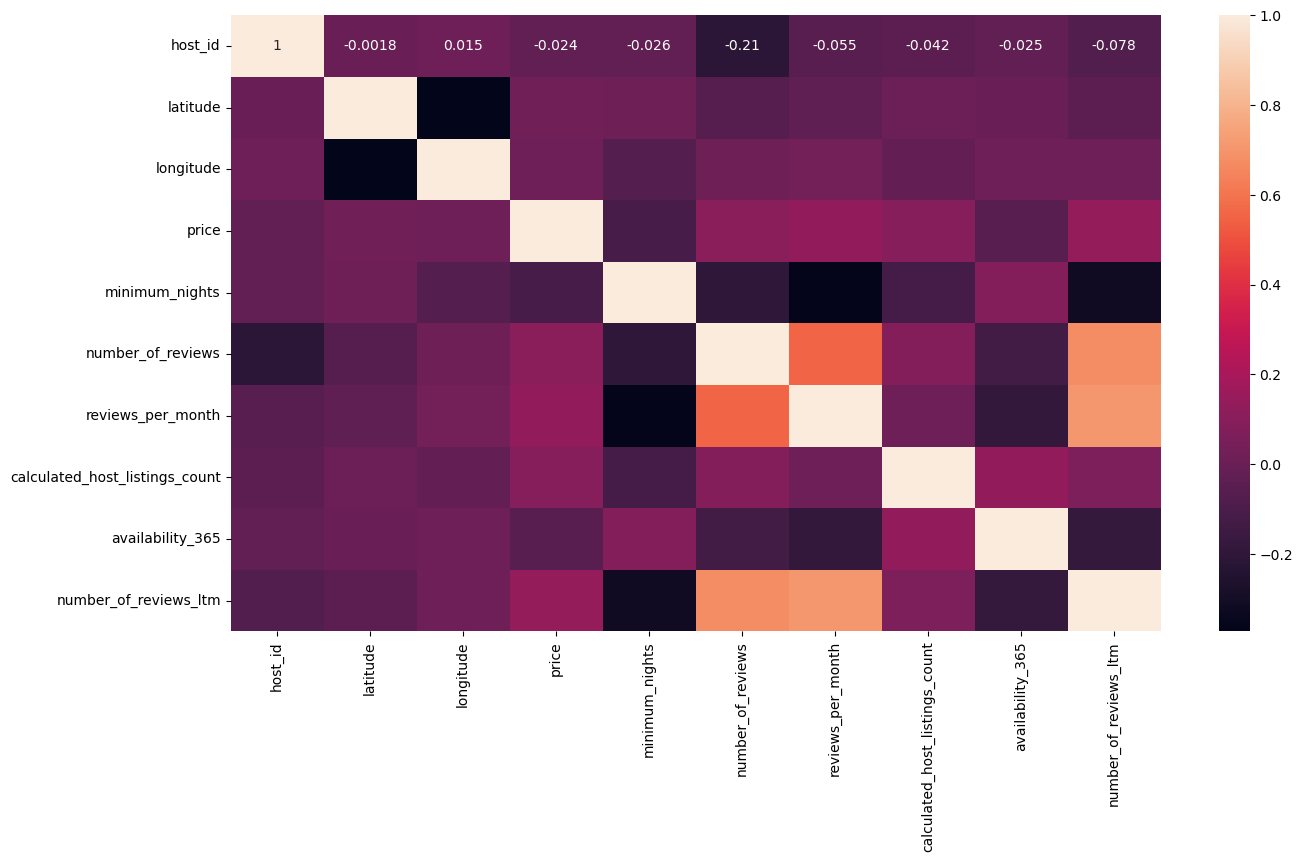

In [20]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)


In [21]:
df['room_type'].value_counts()

Entire home/apt    285
Private room       119
Shared room          3
Name: room_type, dtype: int64

<Axes: xlabel='room_type', ylabel='count'>

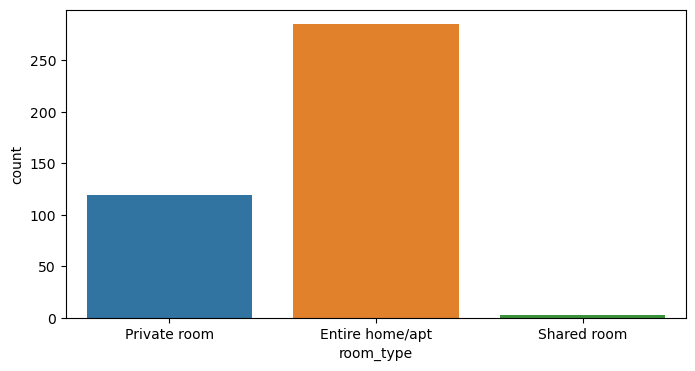

In [22]:
_,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,4))
sns.countplot(x='room_type',data=df)

room_type distribution:<br>
 This graph in the above is a plot between room types and the number of airbnbs that are of that type.</h3>

In [23]:
#  plotting the the host ids vs the number of airbnbs that under each of the hosts

top_host=df.host_id.value_counts().head(10)
top_host

232967878    19
47625981     15
526358730    12
382970529    10
4259750       9
152762198     8
37769478      8
98744672      8
188679144     8
493882819     6
Name: host_id, dtype: int64

<Axes: >

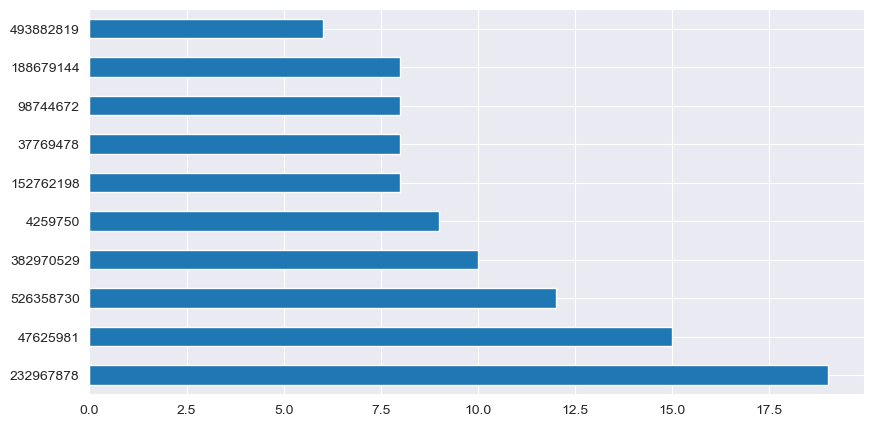

In [24]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = '#00000000'
df.host_id.value_counts().head(10).plot(kind='barh')


the  graph in above is a plot between host ID and the number of air bnb that are managed by them.From this graph we can find the top 10 people that owns or manages most number of airbnbs in New York city.we can see that there is a good distribution between top 10 hosts with the most listings. First host has more than17 listings

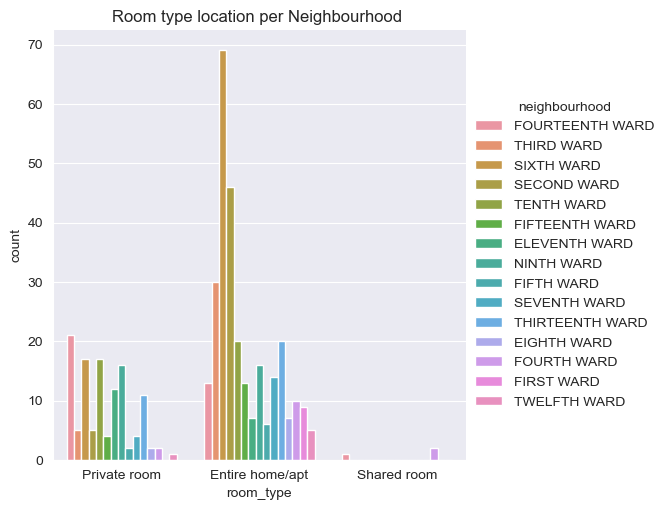

In [25]:
title = 'Room type location per Neighbourhood '
sns.catplot(x='room_type', kind="count", hue="neighbourhood", data=df);
plt.title(title)
plt.ioff()


from this plot, we can discover  distribution of  number of Neighbourhood in Albany, New York  regarding to room_type attribute

In [26]:
#viasualizinf the newyork map from the goven data
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood', palette='Accent', data=df)

<Axes: xlabel='longitude', ylabel='latitude'>

In [27]:
No_roomtype = df.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
No_roomtype

price
neighbourhood   room_type              
EIGHTH WARD     Entire home/apt   922.0
                Private room       55.0
ELEVENTH WARD   Entire home/apt   787.0
                Private room      695.0
FIFTEENTH WARD  Entire home/apt  4889.0
                Private room      213.0
FIFTH WARD      Entire home/apt   638.0
                Private room      137.0
FIRST WARD      Entire home/apt  1009.0
FOURTEENTH WARD Entire home/apt  2698.0
                Private room     1326.0
                Shared room        55.0
FOURTH WARD     Entire home/apt  1597.0
                Private room      217.0
                Shared room       150.0
NINTH WARD      Entire home/apt  1686.0
                Private room     1754.0
SECOND WARD     Entire home/apt  4774.0
                Private room      151.0
SEVENTH WARD    Entire home/apt  1477.0
                Private room      209.0
SIXTH WARD      Entire home/apt  6948.0
                Private room     1348.0
TENTH WARD      Entire home/apt  3381.0
                Private room     1172.0
THIRD WARD      Entire home/apt  2674.0
                Private room      188.0
THIRTEENTH WARD Entire home/apt  3035.0
                Private room      669.0
TWELFTH WARD    Entire home/apt   617.0
                Private room      103.0

In [28]:
maxprice=df.price.max()
df.loc[df['price'] == maxprice]


,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
392,Charming 1920s house sleeps 6-7,30218591,Rebecca,FIFTEENTH WARD,42.67432,-73.815552,Entire home/apt,1750.0,2,0,0.44,1,60,0


In [29]:
 df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)


neighbourhood
FIFTEENTH WARD     300.117647
FOURTH WARD        140.285714
TENTH WARD         123.054054
TWELFTH WARD       120.000000
THIRTEENTH WARD    119.483871
FOURTEENTH WARD    116.542857
FIRST WARD         112.111111
EIGHTH WARD        108.555556
NINTH WARD         107.500000
FIFTH WARD          96.875000
SECOND WARD         96.568627
SIXTH WARD          96.465116
SEVENTH WARD        93.666667
THIRD WARD          81.771429
ELEVENTH WARD       78.000000
Name: price, dtype: float64

In [30]:
maxindex=df.groupby('neighbourhood')['price'].mean().idxmax()
maxneigh=df.groupby('neighbourhood')['price'].mean().max()
print(maxindex)
print(maxneigh)

FIFTEENTH WARD
300.11764705882354


In [31]:
maxindexng=df.groupby('room_type')['price'].mean().idxmax()
maxneighng=df.groupby('room_type')['price'].mean().max()
print(maxindexng)
print(maxneighng)

Entire home/apt
130.2877192982456



    The highest values and the averages highest values in different places are:

Host id 392 owns the airbnb with maximum price of 1750 in Albany, New York which is of

FIFTEENTH WARD is the neighbourhood with maximum average price of 300.117 USD

Entire home/apt is the room type with maximum average price of 130.2877 USD

In [32]:
df.groupby('neighbourhood')['minimum_nights'].mean()


neighbourhood
EIGHTH WARD         3.333333
ELEVENTH WARD       3.736842
FIFTEENTH WARD      1.941176
FIFTH WARD          2.625000
FIRST WARD          6.222222
FOURTEENTH WARD     4.857143
FOURTH WARD         2.142857
NINTH WARD          4.000000
SECOND WARD         2.862745
SEVENTH WARD        4.333333
SIXTH WARD          7.790698
TENTH WARD          4.864865
THIRD WARD         10.685714
THIRTEENTH WARD     5.548387
TWELFTH WARD        2.166667
Name: minimum_nights, dtype: float64

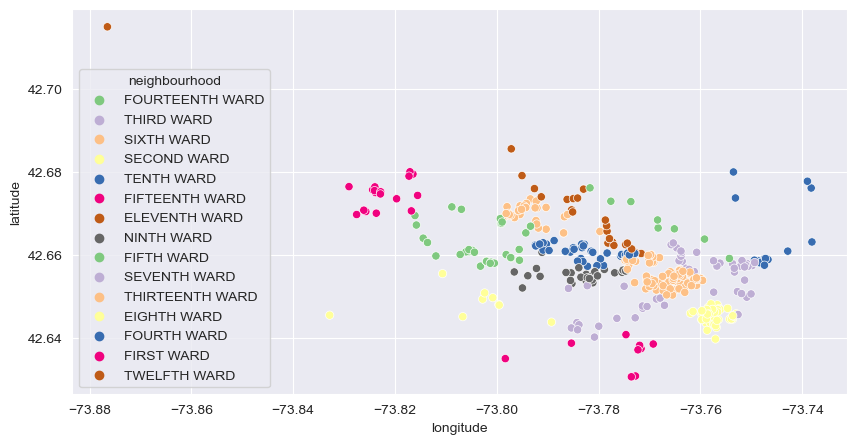

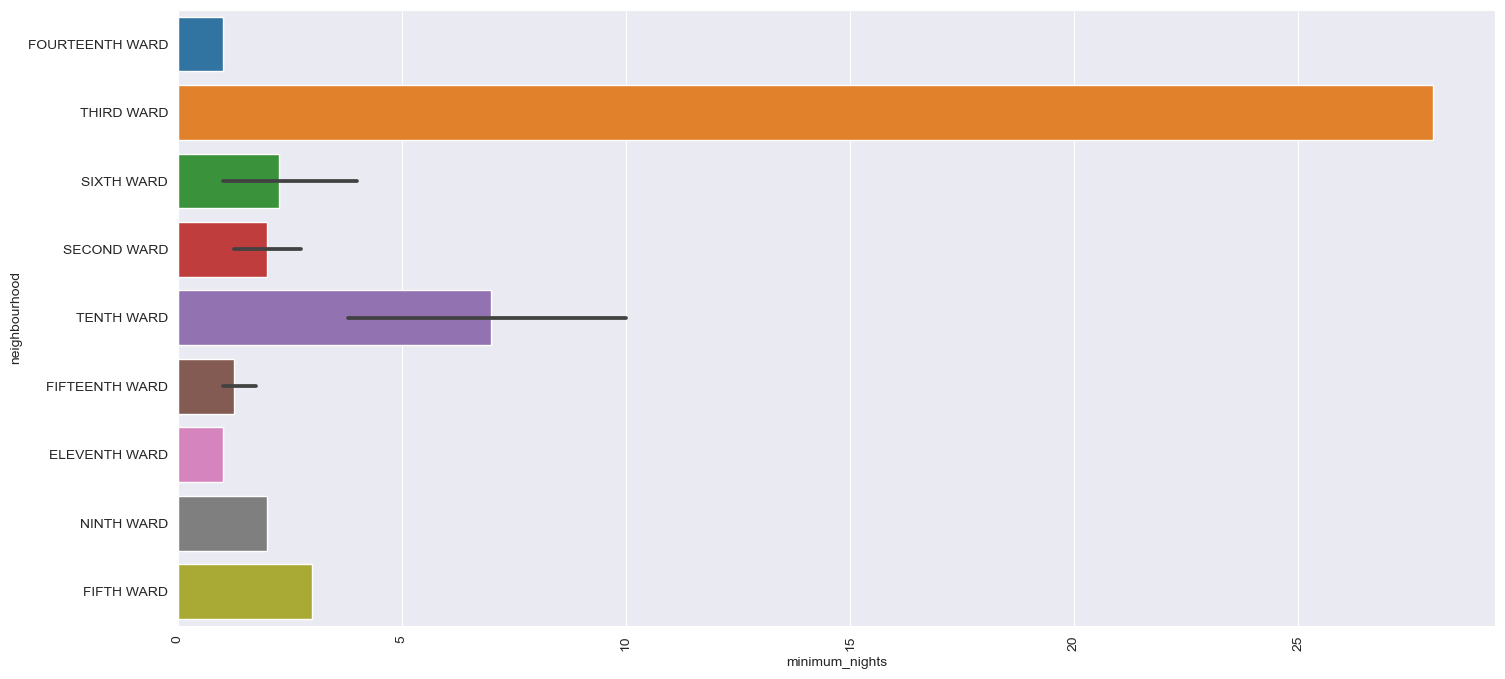

In [33]:
plt.figure(figsize=(17,8))
sns.barplot(x=df.minimum_nights[:25], y=df.neighbourhood[:25]) 
plt.xticks(rotation=90)
plt.show()

The average number of nights stay is higest in SIXTH WARD with a value of 5.5 days. and when it comes to neighbourhoods,THIRD WARD is the place with maximum number of average minimum nuights stay with an average value of 28 days.

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude',y='latitude',hue='room_type',data =df)
plt.ioff()

In [35]:
from wordcloud import WordCloud


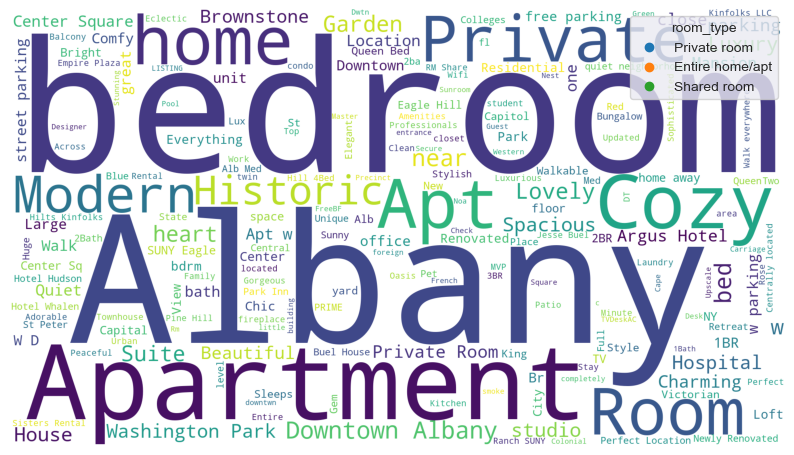

In [36]:
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('name.png')
plt.show()

this word cloud includes most of the words tbat describe the room. mostly adjectives like aprtment,bedroom,downtown Albany,cozy,private,modern,home studio room etc. hence we can understand that this might help in the search results of the airbnbs

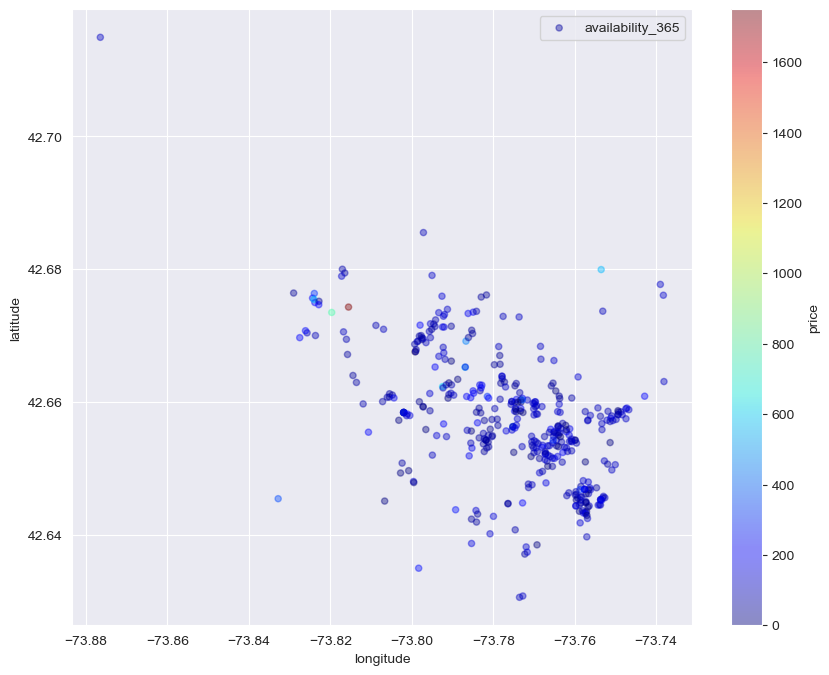

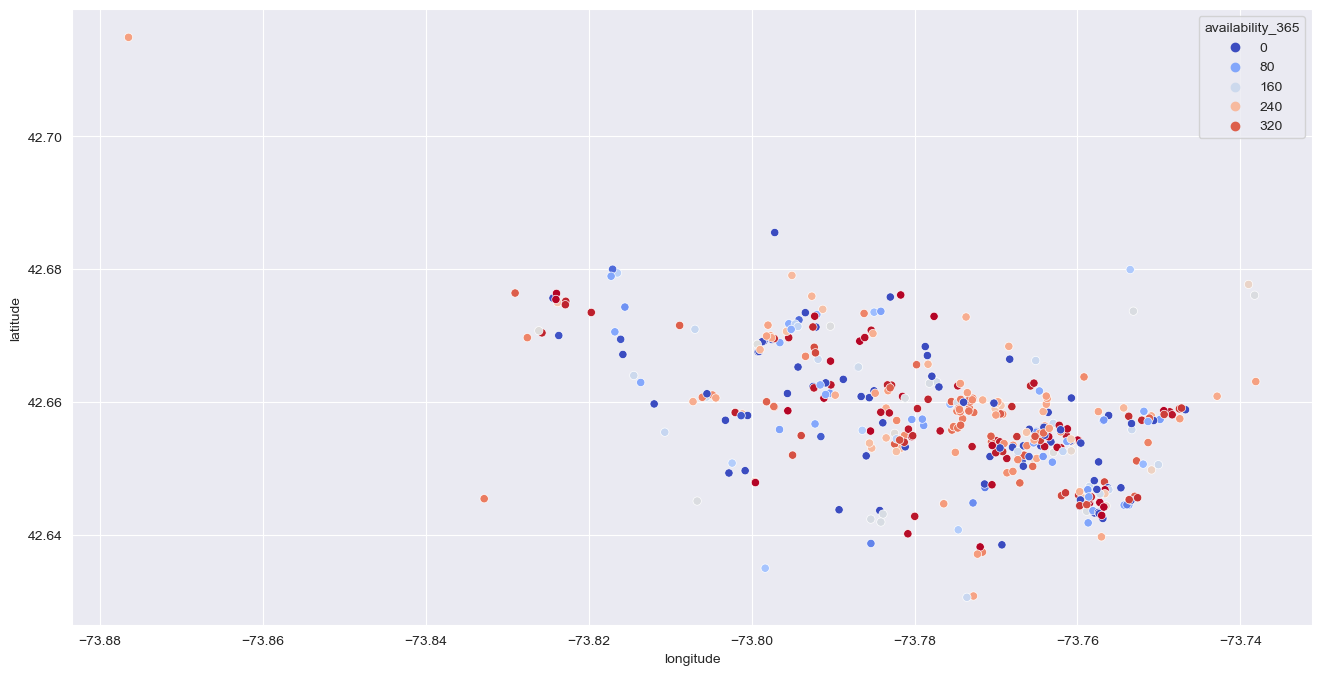

In [46]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.availability_365,palette="coolwarm")
plt.show()